In [1]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.svm import OneClassSVM

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import datetime

%matplotlib inline


def byte_decoder(val):
    # decodes byte literals to strings
    
    return val.decode('utf-8')

def plot_confusion_matrix(cm, title, classes=['abnormal', 'normal'],
                          cmap=plt.cm.Blues):
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

sa_columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
                           "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
                           "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login",
                           "is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
                           "same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
                           "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
                           "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
                           "dst_host_rerror_rate","dst_host_srv_rerror_rate"]
sf_columns = ["duration", "service", "src_bytes", "dst_bytes"]

In [2]:
sa = datasets.fetch_kddcup99(subset='SA', percent10=False, random_state=0)
dfsa = pd.DataFrame(sa.data, columns=sa_columns)
dfsa["target"]=sa.target
anomaly_rate =  1.0 - len(dfsa.loc[dfsa["target"]==b'normal.'])/len(dfsa)
f"SA anomaly rate is {anomaly_rate:.1%}"

dfsa['binary_target'] = [1 if x==b'normal.' else -1 for x in dfsa["target"]]
toDecodeSA = ["protocol_type", "service", "flag", "target"]
le = preprocessing.LabelEncoder()
for f in toDecodeSA:
    dfsa[f] = list(map(byte_decoder, dfsa[f]))
    dfsa[f] = le.fit_transform(dfsa[f])

X_train_sa, X_test_sa, y_train_sa, y_test_sa = train_test_split(dfsa.drop(["target", 'binary_target'], axis=1), dfsa['binary_target'], test_size=0.25, random_state=0)

In [5]:
sa = datasets.fetch_kddcup99(subset='SA', percent10=False, random_state=0)
dfsa = pd.DataFrame(sa.data, columns=sa_columns)
dfsa["target"]=sa.target
anomaly_rate =  1.0 - len(dfsa.loc[dfsa["target"]==b'normal.'])/len(dfsa)
f"SA anomaly rate is {anomaly_rate:.1%}"

dfsa['binary_target'] = [1 if x==b'normal.' else -1 for x in dfsa["target"]]
toDecodeSA = ["protocol_type", "service", "flag", "target"]
le = preprocessing.LabelEncoder()
for f in toDecodeSA:
    dfsa[f] = list(map(byte_decoder, dfsa[f]))
    dfsa[f] = le.fit_transform(dfsa[f])

X_train_sa, X_test_sa, y_train_sa, y_test_sa = train_test_split(dfsa.drop(["target", 'binary_target'], axis=1), dfsa['binary_target'], test_size=0.25, random_state=0)

In [6]:
contamination = [round(0.01*i, 2) for i in range(1, 31)]
c_max = cross_validation(contamination, ds="SA")
print(f"best contamination value: {c_max}")

contamination: 0.01, AUC : 0.8, precision: 19.05%, support: 812, recall: 53.33%, fp: 3451
contamination: 0.02, AUC : 1e+00, precision: 16.25%, support: 812, recall: 99.51%, fp: 4185
contamination: 0.03, AUC : 1e+00, precision: 10.87%, support: 812, recall: 99.63%, fp: 6657
contamination: 0.04, AUC : 1e+00, precision: 8.20%, support: 812, recall: 99.75%, fp: 9094
contamination: 0.05, AUC : 1e+00, precision: 6.59%, support: 812, recall: 99.88%, fp: 11515
contamination: 0.06, AUC : 1e+00, precision: 5.52%, support: 812, recall: 99.88%, fp: 13890
contamination: 0.07, AUC : 1e+00, precision: 4.74%, support: 812, recall: 99.88%, fp: 16314
contamination: 0.08, AUC : 1e+00, precision: 4.14%, support: 812, recall: 99.88%, fp: 18813
contamination: 0.09, AUC : 1e+00, precision: 3.69%, support: 812, recall: 99.88%, fp: 21210
contamination: 0.1, AUC : 1e+00, precision: 3.32%, support: 812, recall: 99.88%, fp: 23673
contamination: 0.11, AUC : 0.9, precision: 3.02%, support: 812, recall: 99.88%, fp: 

In [8]:
c_max = 0.02
contamination = [round(c_max - 0.01 + 0.001*i, 3) for i in range(11)]
c_max = cross_validation(contamination, ds="SA")
print(f"best contamination value: {c_max}")

contamination: 0.01, AUC : 0.8, precision: 19.05%, support: 812, recall: 53.33%, fp: 3451
contamination: 0.011, AUC : 1e+00, precision: 30.50%, support: 812, recall: 99.51%, fp: 1850
contamination: 0.012, AUC : 1e+00, precision: 27.56%, support: 812, recall: 99.51%, fp: 2135
contamination: 0.013, AUC : 1e+00, precision: 25.53%, support: 812, recall: 99.51%, fp: 2369
contamination: 0.014, AUC : 1e+00, precision: 23.70%, support: 812, recall: 99.51%, fp: 2614
contamination: 0.015, AUC : 1e+00, precision: 22.10%, support: 812, recall: 99.51%, fp: 2862
contamination: 0.016, AUC : 1e+00, precision: 20.54%, support: 812, recall: 99.51%, fp: 3140
contamination: 0.017, AUC : 1e+00, precision: 19.23%, support: 812, recall: 99.51%, fp: 3410
contamination: 0.018, AUC : 1e+00, precision: 18.15%, support: 812, recall: 99.51%, fp: 3662
contamination: 0.019, AUC : 1e+00, precision: 17.13%, support: 812, recall: 99.51%, fp: 3928
contamination: 0.02, AUC : 1e+00, precision: 16.25%, support: 812, recall

In [9]:
contamination = [round(c_max - 0.001 + 0.0001*i, 4) for i in range(11)]
c_max = cross_validation(contamination, ds="SA")
print(f"best contamination value: {c_max}")

contamination: 0.01, AUC : 0.8, precision: 19.05%, support: 812, recall: 53.33%, fp: 3451
contamination: 0.0101, AUC : 0.8, precision: 19.05%, support: 812, recall: 53.33%, fp: 3451
contamination: 0.0102, AUC : 0.8, precision: 19.05%, support: 812, recall: 53.33%, fp: 3451
contamination: 0.0103, AUC : 0.8, precision: 19.05%, support: 812, recall: 53.33%, fp: 3451
contamination: 0.0104, AUC : 0.8, precision: 19.05%, support: 812, recall: 53.33%, fp: 3451
contamination: 0.0105, AUC : 0.8, precision: 19.05%, support: 812, recall: 53.33%, fp: 3451
contamination: 0.0106, AUC : 0.8, precision: 19.05%, support: 812, recall: 53.33%, fp: 3451
contamination: 0.0107, AUC : 1e+00, precision: 30.51%, support: 812, recall: 99.51%, fp: 1849
contamination: 0.0108, AUC : 0.8, precision: 19.05%, support: 812, recall: 53.33%, fp: 3451
contamination: 0.0109, AUC : 0.8, precision: 19.05%, support: 812, recall: 53.33%, fp: 3451
contamination: 0.011, AUC : 1e+00, precision: 30.50%, support: 812, recall: 99.5

              precision    recall  f1-score   support

          -1       0.31      1.00      0.47       812
           1       1.00      0.99      1.00    243228

    accuracy                           0.99    244040
   macro avg       0.65      0.99      0.73    244040
weighted avg       1.00      0.99      0.99    244040

AUC : 99.4%


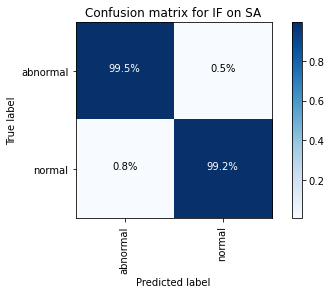

In [10]:
y_pred = IsolationForest(random_state=1, n_jobs=-1, max_samples=0.25, n_estimators=100, contamination=c_max).fit(X_train_sa).predict(X_test_sa)
p, r, f, s = map(lambda x: x[0], precision_recall_fscore_support(y_test_sa, y_pred, labels=[-1]))
print(classification_report(y_test_sa, y_pred))
print(f"AUC : {roc_auc_score(y_test_sa, y_pred):.1%}")
plot_confusion_matrix(confusion_matrix(y_test_sa, y_pred), "Confusion matrix for IF on SA")